In [76]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


In [77]:
from sklearn.datasets import load_boston
import pandas as pd

#boston = load_boston()

In [78]:

from sklearn import cluster
from sklearn.cluster import KMeans
import networkx as nx
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
   
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [79]:
#setting OS

os.chdir('/Users/ruchikasi/Documents/Personal/Springboard/')

In [80]:
df = pd.read_csv('/Users/ruchikasi/Documents/Personal/Springboard/csdf.csv')

Exploring the shape and datatypes for the airbnb singapore listings dataset

In [81]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,Review_Recency,reviews_per_month,calculated_host_listings_count,availability_365
0,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,NaN,0.51,6,351
1,18656726,Master Bedroom at The Clearwater Condo,21900076,Mary,East Region,Bedok,Shared room,14,1,0,NaN,NaN,NaN,2,0
2,37506711,Central 1BR Apt in Foodie Haven Hipster Paradise,29799617,John,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,NaN,4.00,1,34
3,35947264,Senja cozy,75175440,Rain,West Region,Bukit Panjang,Entire home/apt,14,1,1,6/24/19,NaN,0.45,2,0
4,18679631,Small room for you,108408404,Sutthida,Central Region,Marine Parade,Private room,14,2,1,5/14/17,NaN,0.04,1,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 15 columns):
id                                7907 non-null int64
name                              7905 non-null object
host_id                           7907 non-null int64
host_name                         7907 non-null object
neighbourhood_group               7907 non-null object
neighbourhood                     7907 non-null object
room_type                         7907 non-null object
price                             7907 non-null int64
minimum_nights                    7907 non-null int64
number_of_reviews                 7907 non-null int64
last_review                       5149 non-null object
Review_Recency                    0 non-null float64
reviews_per_month                 5149 non-null float64
calculated_host_listings_count    7907 non-null int64
availability_365                  7907 non-null int64
dtypes: float64(2), int64(7), object(6)
memory usage: 926.7+ KB


In [83]:
df.shape

(7907, 15)

total of 7907 rows and 15 columns. next step is to find total sum of na values per columns

In [14]:
df.isna().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
Review_Recency                    7907
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

** Findings of intial review of data 
*  Name as 2 missing names but that shoul not be an issue as we will be using id as our index for most analysis.

* Drop Review_Recency as it is totally blank.

* last review has 35% missing data. But would still like to use it as a variable as it may have an impact on price.

* last review and review per month are correlated as last review data is blank for all the listings with no review. I will keep the data as is for now and may impute missing values at the time of modelling




In [84]:
df.keys()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'Review_Recency',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Now let's explore the data set itself. 

In [85]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,Review_Recency,reviews_per_month,calculated_host_listings_count,availability_365
0,21408571,1 BR @ Little India & Farrer Park MRT,114674497,Mitul,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,NaN,0.51,6,351
1,18656726,Master Bedroom at The Clearwater Condo,21900076,Mary,East Region,Bedok,Shared room,14,1,0,NaN,NaN,NaN,2,0
2,37506711,Central 1BR Apt in Foodie Haven Hipster Paradise,29799617,John,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,NaN,4.00,1,34


In [86]:
# dropping variables which are not required.

#Fields not needed to our problem
to_drop = ["name","host_name", "Review_Recency",]
    
# Drop selected fields in place
df.drop(to_drop, inplace=True, axis=1)

In [87]:
#reviewing new dataset
df.head(3)

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,21408571,114674497,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,0.51,6,351
1,18656726,21900076,East Region,Bedok,Shared room,14,1,0,NaN,NaN,2,0
2,37506711,29799617,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,4.00,1,34


**Approaches for initial EDA**

1. Review univariate analysis of the dataset
2. Look at distribution of continuous columns and cross tabs for categorical columns.
3. Identify if any outliers exist for these variables and determine approach for outlier analysis
4. The target variable to be predicted is price. distribution of price to be reviewed.



In [88]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.907000e+03,7.907000e+03,7907.000000,7907.000000,7907.000000,5149.000000,7907.000000,7907.000000
mean,2.338862e+07,9.114481e+07,169.332996,17.510054,12.807386,1.043669,40.607689,208.726318
std,1.016416e+07,8.190910e+07,340.187599,42.094616,29.707746,1.285851,65.135253,146.120034
min,4.909100e+04,2.366600e+04,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.582180e+07,2.305808e+07,65.000000,1.000000,0.000000,0.180000,2.000000,54.000000
50%,2.470627e+07,6.344891e+07,124.000000,3.000000,2.000000,0.550000,9.000000,260.000000
75%,3.234850e+07,1.553811e+08,199.000000,10.000000,10.000000,1.370000,48.000000,355.000000
max,3.811276e+07,2.885676e+08,10000.000000,1000.000000,323.000000,13.000000,274.000000,365.000000


In [68]:
#list of continuous variables
#list of continous columns
col = ['price','minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count']

In [43]:
#plotting box plots to discover outliers

def drawhist(col):
    for i in col:
        sns.boxplot(x = df[i])
        
        plt.xlabel(i)
        plt.show()
    return()




/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


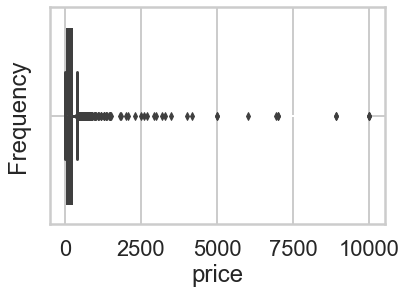

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


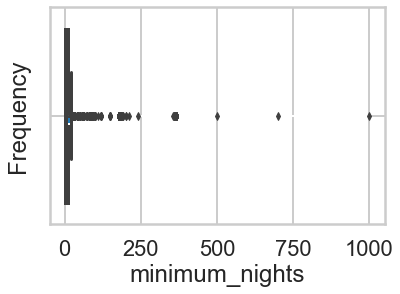

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


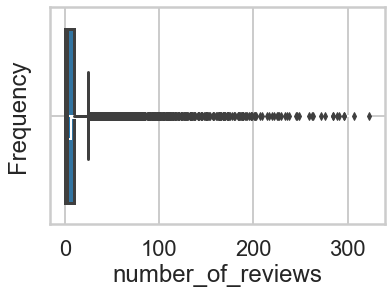

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


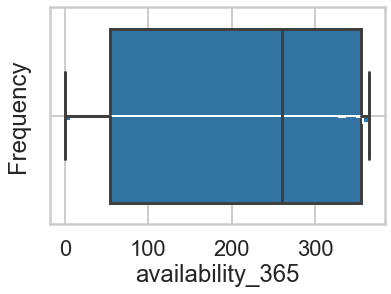

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:62: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


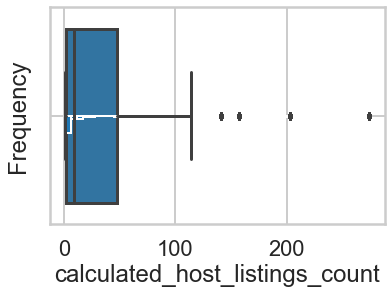

()

In [42]:
drawhist(col)

In [89]:
#using z scores to identify outliers

from scipy import stats
import numpy as np


In [94]:
#syntax : df = pd.DataFrame(data, columns = ['Name', 'Age'])


In [106]:
# writing a function to create additional columns in df for z values for each variable 
def zvalues(col):
    for i in col:
        z = pd.DataFrame(np.abs(stats.zscore(df[i])),columns = [i+" zval"])
        df[i+" zval"]= z[i+" zval"]
    return()

In [107]:
zvalues(col)

()

In [108]:
df.head()

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,pricezval,minimum_nightszval,number_of_reviewszval,availability_365zval,calculated_host_listings_countzval,price zval,minimum_nights zval,number_of_reviews zval,availability_365 zval,calculated_host_listings_count zval
0,21408571,114674497,Central Region,Rochor,Entire home/apt,0,3,9,8/11/19,0.51,...,0.497795,0.344723,0.128169,0.973738,0.531354,0.497795,0.344723,0.128169,0.973738,0.531354
1,18656726,21900076,East Region,Bedok,Shared room,14,1,0,NaN,NaN,...,0.456639,0.392238,0.431140,1.428548,0.592769,0.456639,0.392238,0.431140,1.428548,0.592769
2,37506711,29799617,Central Region,Geylang,Entire home/apt,14,3,4,8/26/19,4.00,...,0.456639,0.344723,0.296486,1.195848,0.608122,0.456639,0.344723,0.296486,1.195848,0.608122
3,35947264,75175440,West Region,Bukit Panjang,Entire home/apt,14,1,1,6/24/19,0.45,...,0.456639,0.392238,0.397477,1.428548,0.592769,0.456639,0.392238,0.397477,1.428548,0.592769
4,18679631,108408404,Central Region,Marine Parade,Private room,14,2,1,5/14/17,0.04,...,0.456639,0.368480,0.397477,1.428548,0.608122,0.456639,0.368480,0.397477,1.428548,0.608122


In [124]:
# removing outliers based on 3 variables i found relevant

df_o = df[(df['price zval']<3) & (df['minimum_nights zval']<3) & (df['availability_365 zval'] <3)]

In [125]:
df_o.shape

(7699, 22)

In [133]:
print((7907- 7699)/7907,"outliers removed")

0.02630580498292652 outliers removed


In [ ]:
#how do i increase the size of the chart?
#plt.rcParams['figure.figsize'] = (25,10)
#make your plot appear within  notebook
#%matplotlib inline

In [32]:
#%matplotlib inline
#changing font size of the plots
#matplotlib.rcParams.update({'font.size': 18})

In [36]:
# function to plot histograms for continuos variables

#list of continous columns
col = ['price','minimum_nights','number_of_reviews','availability_365','calculated_host_listings_count']

def drawhist(col):
    for i in col:
        df[i].plot(kind = 'hist',bins = 50,normed = True)
        plt.xlabel(i)
        plt.show()
    return()

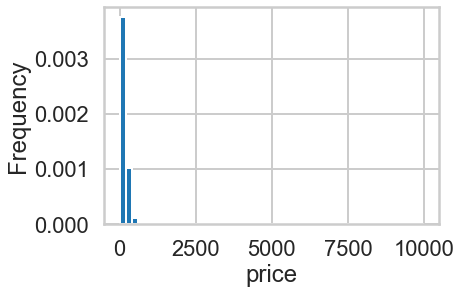

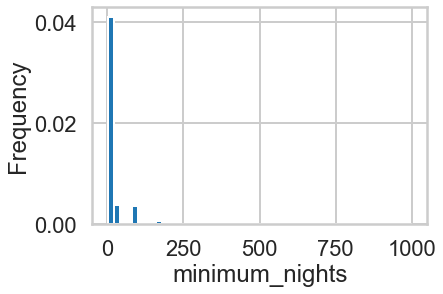

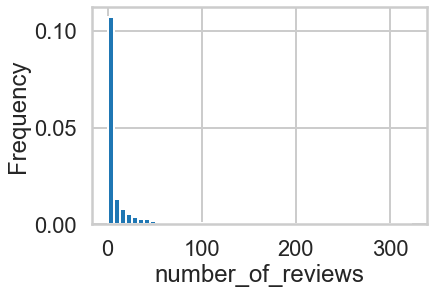

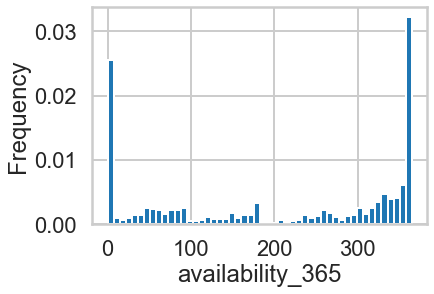

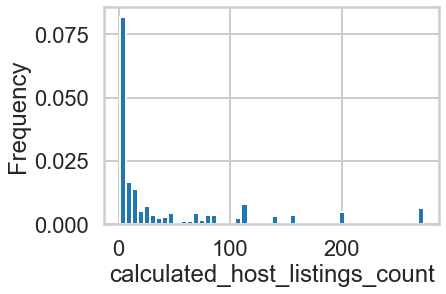

()

In [34]:
drawhist(col)